# Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('big_mart_sales.csv')

In [53]:
data.head()

data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

Missing value removal

In [4]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
med = data.Outlet_Size.mode()[0]

In [6]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(value=med)

In [7]:
wg = data.Item_Weight.mean()

In [8]:
wg

12.857645184136183

In [9]:
data.Item_Weight = data.Item_Weight.fillna(value=wg)

In [10]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
# help(pd.DataFrame)
data.shape

(8523, 12)

In [12]:
data.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Mapping Item Fat Content

In [13]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
mapp = {'Low Fat':'LF' , 'low fat':'LF','LF':'LF','Regular':'R','reg':'R'}

In [15]:
data.Item_Fat_Content = data.Item_Fat_Content.map(mapp)

In [16]:
data.Item_Fat_Content.unique()

array(['LF', 'R'], dtype=object)

In [17]:
data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [18]:
# data.Outlet_Size = data.Outlet_Size.map({'High':1,'Medium':2,'Low':3})

In [19]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,R,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,R,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Categorical columns :

Item_Identifier           
Item_Fat_Content              
Outlet_Type                   
Outlet_Location_Type          
Outlet_Size                   
Outlet_Identifier             

In [20]:
data.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [21]:
data = data.drop(['Item_Identifier','Item_Weight','Item_Visibility','Item_MRP'],axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   object 
 1   Item_Type                  8523 non-null   object 
 2   Outlet_Identifier          8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Size                8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Type                8523 non-null   object 
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 532.8+ KB


In [22]:
data.describe()

,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000
mean,1997.831867,2181.288914
std,8.371760,1706.499616
min,1985.000000,33.290000
25%,1987.000000,834.247400
50%,1999.000000,1794.331000
75%,2004.000000,3101.296400
max,2009.000000,13086.964800


C:\Users\sheet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

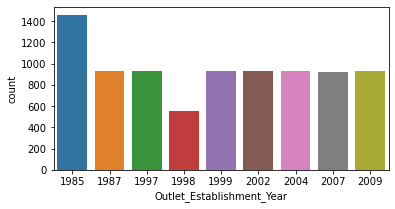

In [23]:

plt.figure(figsize=(6,3))

sns.countplot(data['Outlet_Establishment_Year'])

C:\Users\sheet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

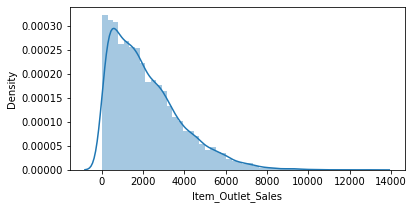

In [24]:

plt.figure(figsize=(6,3))

sns.distplot(data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

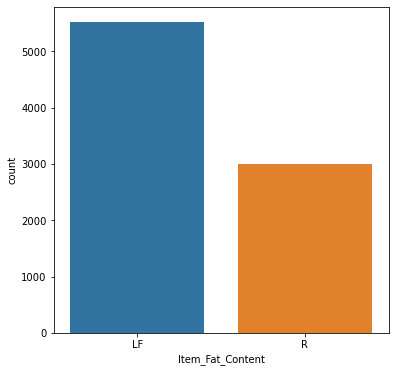

In [25]:

plt.figure(figsize=(6,6))

sns.countplot(x = 'Item_Fat_Content' , data = data)

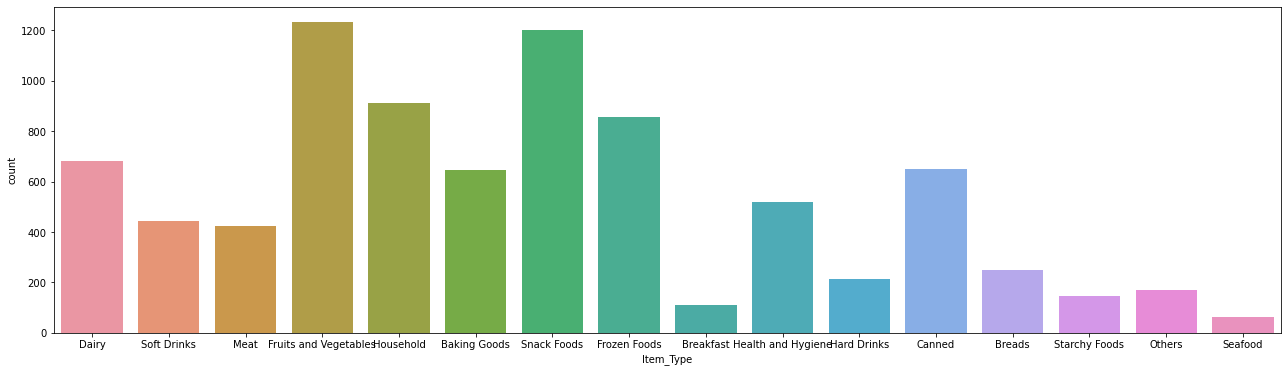

In [26]:
plt.figure(figsize=(22,6))

sns.countplot(x = 'Item_Type' , data = data)
plt.title='Item Type'

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

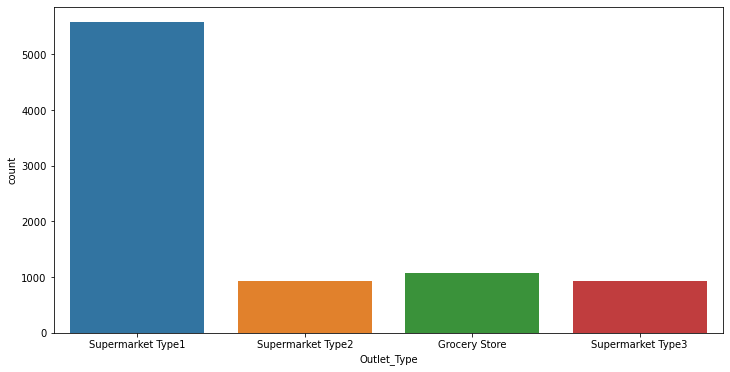

In [27]:

plt.figure(figsize=(12,6))

sns.countplot(x = 'Outlet_Type' , data = data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

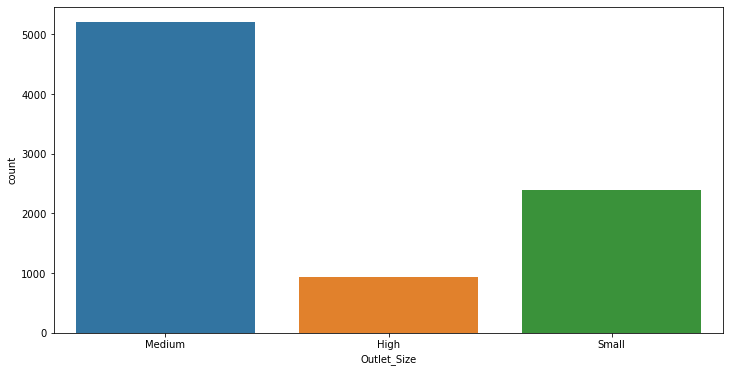

In [28]:

plt.figure(figsize=(12,6))

sns.countplot(x = 'Outlet_Size' , data = data)

In [29]:
df = data

In [30]:
lf_out_size = LabelEncoder()
lf_out_type = LabelEncoder()
lf_fat = LabelEncoder()
lf_out_loc = LabelEncoder()
lf_type = LabelEncoder()
lf_out_id = LabelEncoder()
# lf_item_id = LabelEncoder()

data['Outlet_Size'] = lf_out_size.fit_transform(data['Outlet_Size'])
data['Outlet_Type'] = lf_out_type.fit_transform(data['Outlet_Type'])
data['Item_Fat_Content'] = lf_fat.fit_transform(data['Item_Fat_Content'])
data['Outlet_Location_Type'] = lf_out_loc.fit_transform(data['Outlet_Location_Type'])
data['Item_Type'] = lf_type.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = lf_out_id.fit_transform(data['Outlet_Identifier'])
# data['Item_Identifier'] = lf_item_id.fit_transform(data['Item_Identifier'])

In [31]:
data.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,4,9,1999,1,0,1,3735.1380
1,1,14,3,2009,1,2,2,443.4228
2,0,10,9,1999,1,0,1,2097.2700
3,1,6,0,1998,1,2,0,732.3800
4,0,9,1,1987,0,2,1,994.7052



# Splitting data 


In [32]:


x = data.drop(columns = 'Item_Outlet_Sales',axis=1)
y = data['Item_Outlet_Sales']



In [33]:
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=0 , test_size=0.2)

DecisionTreeRegressor

In [34]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression()
reg.fit(train_x,train_y)

# prediction on training data
pr = reg.predict(train_x)
# mse
ms1 = np.sqrt(mse(pr,train_y))

# prediction on training data
pr2 = reg.predict(test_x)
# mse
ms2 = np.sqrt(mse(pr2,test_y))

In [35]:
ms1,ms2

(1540.2114695832408, 1538.7676593305391)

In [37]:
import pickle

data = {"model":reg ,
"lf_out_size":lf_out_size , 
"lf_out_type":lf_out_type,
"lf_fat": lf_fat,
"lf_out_loc":lf_out_loc,
"lf_type":lf_type,
"lf_out_id" : lf_out_id
 }

with open('saved_model.pkl','wb') as file:
    pickle.dump(data,file)
    

In [38]:
with open('saved_model.pkl','rb') as file:
    data = pickle.load(file)
    
regressor = data['model']
lf_out_size = data['lf_out_size']
lf_out_type = data['lf_out_type']
lf_fat  = data["lf_fat"]
lf_out_loc = data["lf_out_loc"]
lf_type = data["lf_type"]
lf_out_id = data['lf_out_id']
 


# Creating choice

In [39]:
X = np.array([["LF", "Soft Drinks" ,"OUT013", 2002 , "Medium", "Supermarket Type1", "Tier 2"]])

In [40]:
X

array([['LF', 'Soft Drinks', 'OUT013', '2002', 'Medium',
        'Supermarket Type1', 'Tier 2']], dtype='<U17')

In [41]:
X[:,4] = lf_out_size.transform(X[:,4])
X[:,5] = lf_out_type.transform(X[:,5])
X[:,0] = lf_fat.transform(X[:,0])
X[:,6] = lf_out_loc.transform(X[:,6])
X[:,1] = lf_type.transform(X[:,1])
X[:,2] = lf_out_id.transform(X[:,2])

X = X.astype(float)


In [42]:
regressor.predict(X)

C:\Users\sheet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1868.50876444])